# **Algorithms for Data Science**

## **Homework # 3**
 
## **Ricardo Alvarez - ralvar16**

In [8]:
# code cell to input all the functions and libraries necessary
import pandas as pd # importing the panda library 
import numpy as np # importing numpy library
import random as rd # importing the random library
import math as mt # maths libray
import copy
import matplotlib.pyplot as plt # importing MatPlotLib for visualization plotting 

import RAlvarez_HW3_functions as RA # importing the library of customized functions
from tabulate import tabulate


# name of the input file on kaggle
#irisInput = "../input/a4dshw3data/iris.csv"
#featuresInput = "../input/a4dshw3data/trainFeatures.csv"
#featuresInput2 = "../input/a4dshw3data/trainFeatures.xls"

# name of the input file on local
irisInput = "iris.csv"
featuresInput = "trainFeatures.csv"

***
### **Problem 1 - Module 4 and 5**

10 points total

In this problem use the developed numerical features from HW2. In this problem the following is to be completed:

***

####  (a) (5 points)  For each combination of number apply the FDR, e.g., 0 vs 1, 0 vs 2, ..., 0 vs 9, ..., 8 vs 6, 8 vs 7, 8 vs 9.

In [9]:
# Giving name to the columns of the excel file
# The excel file was saved as a csv file with ; as separator.
# The features data set from excel is stored in a Panda structure
featuresPanda = pd.read_csv(featuresInput, sep = ";",header = None)

# Applying the feature ranking using the FDR
rankingOfFeatures = RA.FeatureRanking(featuresPanda)

# Creating a panda from the feature ranking
featureRankPanda = pd.DataFrame.from_records(rankingOfFeatures)

# name of the output file
OutPutFileName = "Panda1.csv"

# Saving to a CSV file
featureRankPanda.to_csv(OutPutFileName)

####  (b) (5 points) Place the results in a table.

In [10]:
# Creating a panda from the feature ranking
featureRankPanda = pd.DataFrame.from_records(rankingOfFeatures)

# name of the output file
OutPutFileName = "Panda1.csv"

# Saving the Panda structure to a CSV file
featureRankPanda.to_csv(OutPutFileName)

# Additionally the feature ranking table will be saved
# as a table in a *.txt file for better visualization
cols = list(featuresPanda.columns)
cols.insert(0,"# vs #")

# creating the output file for each part
outputFileName = "RAlvarez_HW3_featureTable.txt"
outputFile = open(outputFileName,"w")
print("\n")
outputFile.write("Algorithms for Data Science\nHomework 3\nRicardo Alvarez\n")
outputFile.write(tabulate(featureRankPanda,headers=cols,tablefmt="fancy_grid"))

47615

***
### **Problem 2 - Module 6**

35 points total

In this problem, you will be developing pseudocode and implementing your development in Python or R for the Expectation Maximization method. You are allowed to use either the Iris data set or the developed numerical features from HW2. In this problem the following is to be completed:

***

####  (a) (20 points) The development and implementation of the Expectation Maximization method should be for a generic number of clusters, features and observations.

This problem will be developed using the Iris data set

#### (b) Apply your implementation using either the Iris data or the features generated from HW 2.

##### i. Use the top two ranked features.

From previous homeworks, we already know that the most ranked features of the Iris dataset are the petal length and petal width which are the third and forth column.

##### ii. (5 points) Create 3 clusters for the Iris data or 4 clusters using the 4 numerical values that have the best separation.

This approach creates 3 clusters, and can be setup using the value of numClusters.

##### iii. (5 points) Display the 3 species or 4 numerical values using different colors for a good visual representation.

##### iv. (5 points) Provide an analysis of your results, e.g., what is your observation of the results, how well did the clusters group each class, etc.

In [11]:
def ExpectationMaximization(data,numClusters,mean_1,std_1,prob_1,threshold):
    # function of expectation maximization
    # [Inputs]: Data of the ranked features,proposed number of clusters, initial mean, initial standard deviation and the threshold of thecode
    
    N = data.shape[0]
    D = data.shape[1]
    iterations = 0

    # color for the plot
    pltCols = ["blue","green","red"]

    # the variation of the means is going to be stored for analysis
    meanVariation = []
    
    initializeD = np.ones(D)
    initializeD = initializeD.reshape(len(initializeD), 1)
    initializeN = np.ones(N)
    initializeN = initializeN.reshape(len(initializeN), 1)

    # convergence conditional
    convergence = False

    while convergence == False:

        # in case the array is transposed
        if data.shape[0] > data.shape[1]:
            data = data.T

        # initial values and values from previous iteration are saved
        previousMean = copy.deepcopy(mean_1)
        meanVariation.append(previousMean)
        previousStd = copy.deepcopy(std_1)
        previousProb = copy.deepcopy(prob_1)

        ##############################################################
        # Expectation step of the Expectation maximization algorithm
        g = np.zeros([numClusters,N])
        prob_k_g = np.zeros([numClusters,N])
        for k in range(numClusters):
            # Here I will do the operations step by step using the nomenclature
            # established in module 6 pdf and in the matlab example
            xn_mk = data - mean_1[:,k]
            xn_mk_sq = np.multiply(xn_mk,xn_mk)
            sum_xn_mk_sq = xn_mk_sq.sum(axis = 0)
            sigmak_sq = std_1[:,k] ** 2
            xn_mk_sq_sigmak_sq = np.divide(sum_xn_mk_sq,sigmak_sq)
            xn_mk_sq_sigmak_sq = xn_mk_sq_sigmak_sq/2
            exp_value = []
            for point in range(N):
                exp_value.append(mt.exp(-xn_mk_sq_sigmak_sq[0, point]))
            exp_value = np.array(exp_value)
            g[k,:] = exp_value / (mt.sqrt(2*mt.pi) ** D)
            
            for point in range(N):
                g[k,point] = g[k,point]/(std_1[0,k] ** D)
            exp_value = np.array(exp_value)
            prob_k_g[k,:] = prob_1[:,k] * g[k,:]
        
        prob_i_k_n = np.divide(prob_k_g,sum(prob_k_g))
        
        ##############################################################
        # Maximization step

        sum_prob_i_k_n = prob_i_k_n.sum(axis = 1)
        for k in range(numClusters):
            p_i_k_n_xn = (initializeD * prob_i_k_n[k] * data)/sum_prob_i_k_n[k]
            for row in range(mean_1.shape[0]):
                mean_1[row,k] = p_i_k_n_xn.sum(axis = 1)[row]
            
            xn_mk = data - mean_1[:,k]
            xn_mk_sq = np.multiply(xn_mk,xn_mk)
            sum_xn_mk_sq = xn_mk_sq.sum(axis = 0)
            xn_mk_sq_prob_ikn = np.multiply(sum_xn_mk_sq, prob_i_k_n[k])
            std_1[0,k] = mt.sqrt(np.sum(xn_mk_sq_prob_ikn) / sum_prob_i_k_n[k] / D)

        prob_1 = sum_prob_i_k_n / np.sum(sum_prob_i_k_n)
        prob_1 = prob_1.reshape(1, len(prob_1))

        ##############################################################
        # Convergence verification

        # Number of iterations performed
        iterations += 1
            
        # Convergence of the mean
        meanDiff = mean_1 - previousMean
        sq_meanDiff = np.sum(np.multiply(meanDiff,meanDiff), axis = 0)
        meanDelta = np.zeros(numClusters)
        for k in range(numClusters):
            meanDelta[k] = mt.sqrt(sq_meanDiff[0,k])
        meanDelta = max(meanDelta)
        sMean = np.sum(np.multiply(mean_1,mean_1),axis=0)
        for k in range(numClusters):
            sMean[0,k] = mt.sqrt(sMean[0,k])
        sMean = np.mean(sMean)
        meanConverge = meanDelta <= sMean*threshold

        # Convergence of the standard deviation
        stdDiff = std_1 - previousStd
        sq_stdDiff = np.sum(np.multiply(stdDiff,stdDiff), axis = 1)
        sigmaDelta = mt.sqrt(float(sq_stdDiff))
        sSigma = mt.sqrt(np.sum(np.multiply(std_1,std_1),axis=1))
        sigmaConverge = sigmaDelta <= sSigma*threshold

        # Convergence of the probability
        probDiff = prob_1 - previousProb
        sq_probDiff = np.sum(np.multiply(probDiff,probDiff), axis = 1)
        probDelta = mt.sqrt(float(sq_probDiff))
        sProb = mt.sqrt(np.sum(np.multiply(prob_1,prob_1),axis=1))
        probConverge = probDelta <= sProb*threshold

        
        if probConverge and sigmaConverge and meanConverge:
            convergence = True
            print(f"The EM algorithm used {iterations} iterations to converge.")
    
    # Return the result of the probability, mean value and standard deviation
    return prob_i_k_n, mean_1, std_1, meanVariation, iterations

    
    a = 1      

The threshold used in this program is 4.335943113621737e-07
The EM algorithm used 64 iterations to converge.


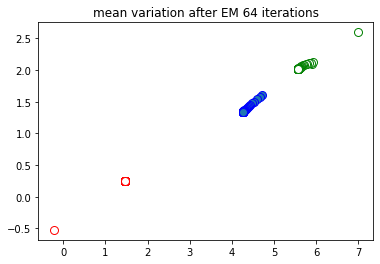

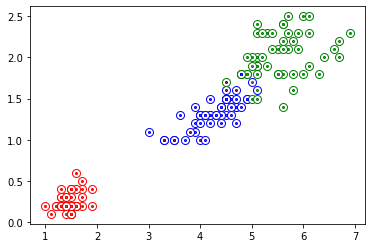

In [12]:
# ranked features petal length and petal width
rankedFeatures = [2,3]

# number of Clusters
numClusters = 3
numFeatures = 4

# After reading the iris.csv file in a generic for,m, the data obtained from the input file is stored in a Panda structure
IrisPanda = pd.read_csv(irisInput)

#saving the data in a numpy array without the species column
irisNP = np.array(IrisPanda)
irisNP = np.delete(irisNP,-1,axis = 1)

# features of the data set
irisFeatures = list(IrisPanda.columns)

# the species column is eliminated 
irisFeatures.remove("species")

# species
SpeciesPanda = IrisPanda["species"].drop_duplicates()

#Amount of observations
numObservations = IrisPanda.shape[0]

#Observations per species
numPerSpecie = int(numObservations/len(SpeciesPanda))

# the data set is divided by species, it is known that the first 50 is setosa, from 51 to 100 is versicolor and from 101 to 150 is virginica
yValues = [0] * numPerSpecie + [1] * numPerSpecie + [2] * numPerSpecie

#Mean vector of the Iris set
meanIris  = np.mean(irisNP, axis = 0)
meanIris = meanIris.reshape(len(meanIris), 1)

#Standard deviation vector of the Iris Set
stdIris = np.std(irisNP, axis = 0, dtype = np.float64,ddof = 1)
stdIris = stdIris.reshape(len(stdIris), 1)

""" # Generating the random initializers
randNumbers = []
for randIndex in range(numClusters):
    randNumbers.append(random.random()) """

randNumbers = np.asmatrix([0.5377, 1.8339, -2.2588])

# Initialize K
initializeK = np.asmatrix(np.ones(numClusters))

# Initial mean for the expectation minimization
initialMean = np.matmul(meanIris,initializeK) + np.matmul(stdIris, randNumbers)

# Initial standard deviation
initialStd = np.mean(stdIris) * initializeK

# initial Probability
initProb = initializeK / numClusters

# Threshold to determine convergence
convergeThreshold = stdIris.min() * 0.000001
print(f"The threshold used in this program is {convergeThreshold}")

[prob_ikn, finalMean, finalStd, meanVar,iters] = \
    ExpectationMaximization(irisNP[:,rankedFeatures],numClusters, initialMean[rankedFeatures,:],initialStd,initProb,convergeThreshold)

plotColors = ["blue","green","red"]
# Plotting the mean variation
meanSetosaVarX = []
meanVirginicaVarX = []
meanVersicolorVarX = []
meanSetosaVarY = []
meanVirginicaVarY = []
meanVersicolorVarY = []

for i in range(len(meanVar)):
    meanSetosaVarX.append(meanVar[i][0,0])
    meanSetosaVarY.append(meanVar[i][1,0])
    meanVersicolorVarX.append(meanVar[i][0,1])
    meanVersicolorVarY.append(meanVar[i][1,1])
    meanVirginicaVarX.append(meanVar[i][0,2])
    meanVirginicaVarY.append(meanVar[i][1,2])
        
setosaX = irisNP[0:50,2]
setosaY = irisNP[0:50,3]
versicolorX = irisNP[50:100,2]
versicolorY= irisNP[50:100,3]
virginicaX = irisNP[100:150,2]
virginicaY = irisNP[100:150,3]

plt.figure()
plt.plot(meanSetosaVarX,meanSetosaVarY,"o",markersize = 8,mfc = None , mec=plotColors[0]) 
plt.plot(meanVersicolorVarX,meanVersicolorVarY,"o", markersize = 8,mfc = "w", mec=plotColors[1]) 
plt.plot(meanVirginicaVarX,meanVirginicaVarY,"o",markersize = 8,mfc = "w", mec=plotColors[2]) 
plt.title(f"mean variation after EM {iters} iterations")

plt.figure()
plt.plot(setosaX,setosaY,"o",markersize = 8,mfc = "white",mec=plotColors[2])
plt.plot(versicolorX,versicolorY,"o",markersize = 8,mfc = "white",mec=plotColors[0])
plt.plot(virginicaX,virginicaY,"o",markersize = 8,mfc = "white",mec=plotColors[1])

classEM = np.argmax(prob_ikn,axis = 0)
temp = np.max(prob_ikn,axis = 0)

ck = (classEM == 0)
plt.plot(irisNP[ck,rankedFeatures[0]],irisNP[ck,rankedFeatures[1]],".",markersize = 4,mec=plotColors[0])
#plt.fill(irisNP[ck,rankedFeatures[0]],irisNP[ck,rankedFeatures[1]],alpha=1,c=plotColors[0])
ck = (classEM == 1)
plt.plot(irisNP[ck,rankedFeatures[0]],irisNP[ck,rankedFeatures[1]],".",markersize = 4,mec=plotColors[1])
ck = (classEM == 2)
plt.plot(irisNP[ck,rankedFeatures[0]],irisNP[ck,rankedFeatures[1]],".",markersize = 4,mec=plotColors[2])

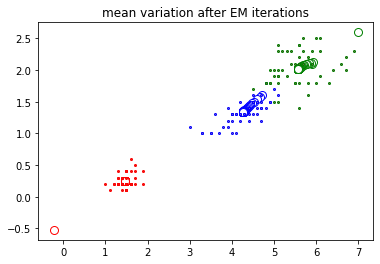

In [13]:


plotColors = ["blue","green","red"]
# Plotting the mean variation
meanSetosaVarX = []
meanVirginicaVarX = []
meanVersicolorVarX = []
meanSetosaVarY = []
meanVirginicaVarY = []
meanVersicolorVarY = []

for i in range(len(meanVar)):
    meanSetosaVarX.append(meanVar[i][0,0])
    meanSetosaVarY.append(meanVar[i][1,0])
    meanVersicolorVarX.append(meanVar[i][0,1])
    meanVersicolorVarY.append(meanVar[i][1,1])
    meanVirginicaVarX.append(meanVar[i][0,2])
    meanVirginicaVarY.append(meanVar[i][1,2])
        
plt.figure()
plt.plot(meanSetosaVarX,meanSetosaVarY,"o",markersize = 8,mfc = "w", mec=plotColors[0]) 
plt.plot(meanVersicolorVarX,meanVersicolorVarY,"o", markersize = 8,mfc = "w", mec=plotColors[1]) 
plt.plot(meanVirginicaVarX,meanVirginicaVarY,"o",markersize = 8,mfc = "w", mec=plotColors[2]) 
plt.title("mean variation after EM iterations")

setosaX = irisNP[0:50,2]
setosaY = irisNP[0:50,3]
versicolorX = irisNP[50:100,2]
versicolorY= irisNP[50:100,3]
virginicaX = irisNP[100:150,2]
virginicaY = irisNP[100:150,3]
plt.plot(setosaX,setosaY,".",markersize = 4,mec=plotColors[2])
plt.plot(versicolorX,versicolorY,".",markersize = 4,mec=plotColors[0])
plt.plot(virginicaX,virginicaY,".",markersize = 4,mec=plotColors[1])


***
### **Problem 3 - Module 7**
***
5 points total

Define in your own words the following terms:

**(a) agent:** Entity that is capable of sensing thru sensors the status of the environment that surrounds it, and is also capable of act on this environment thru actuators.

**(b) agent function:** approach or mathematical function that maps the status of the environment sensed by the agent, with the action to be performed.

**(c) agent program:** Actual implementation of the agent function.

**(d) artificial intelligence:** Entity that is capable of thinking and acting similar to humans for the decision making process. It is often said that the AI should: (i) Think rationally, (ii) think like a human, (iii) act rationally and (iv) act like a human.

**(e) autonomy:** Capability to make a decision without the interference of an outside entity or process.

**(f) goal-based agent:** This agent choose the action to be performed in order to reduce the distance or time to reach a determined goal

**(g) intelligence:** Capability of an entity to perform an action of make a decision based in knowledge or skills.

**(h) learning agent:** A learning agent is an agent that starts with a base knowledge, but is capable of learning new knowledges and adapt its decisions to the newly acquired knowledge.

**(i) logical reasoning:** Capability to be able to make the best decision using the logical thinking acquired from previous experiences..

**(j) model-based agent:** Agent that is capable of taking decisions without observing the entire environment with the usage of an internal model that will model the environment outside, and is able to make an action matching the model used.

**(k) rationality:** Capability of the entity to make the best decision with the information obtained.

**(l) reflex agent:** A reflex agent is an agent that takes an action based in a specific condition. It is usually seen in algorithms as "if .... then ...."  

**(m) utility-based agent:** This agent will take an action based in the status of the environment and the information obtained, however this agent will also evaluate how good or "happy" the agent is with this action and compare this with other actions that can also be applied. 


***
### **Problem 4 - Module 8**
***
35 points total

In this problem you are to develop and implement a k-fold cross validation algorithm. You are allowed to use either the Iris data set or the developed numerical features from HW2 to test your implementation. In this problem the following is to be completed:

#### (a) (5 points) Develop an algorithm to randomly separate data into groups of testing and training groups based on the number of desired folds/experiments, the term used will be k-fold cross validation. Use the 5-fold cross validation as a reference.

In [14]:
# list of all the observations
observationList = list(range(numObservations))

# amount of experiments
amountExperiments = 5

# the test data is 1/5 of the number of observations
amountTest = int(numObservations / amountExperiments)

#index of the test data
testIndex = []
trainingIndex = []

# Creating the test data indexes for each experiment
for experiment in range(amountExperiments):
    currentObservationList = copy.deepcopy(observationList)
    testIndex.append([])
# selecting the observations index
    for i in range(amountTest):
        choice = rd.choice(currentObservationList)
        testIndex[experiment].append(choice)
        currentObservationList.remove(choice)
    
    trainingIndex.append(currentObservationList)


a = 1

***
### **Problem 5 - Module 8**
***
35 points total

The Parzen window algorithm density model is optimized by maximizing the likelihood of the training data with the use of a Gaussian window surrounding each input data point. You are allowed to use either the Iris data set or the developed numerical features from HW2. In this problem the following is to be completed: